<a href="https://colab.research.google.com/github/BabinRV/Dissertation/blob/main/Dissertation_TD_and_IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
2+2

4

In [ ]:
2+2

4

In [ ]:
import torch

In [ ]:
import numpy as np

In [ ]:
import torch.nn as nn

In [ ]:
import torch.nn.functional as F

In [ ]:
import numpy as np
import pandas as py

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd

In [ ]:
path="/content/drive/MyDrive/Datasets/2020.06.19.csv"
df=pd.read_csv(path)
df.head(5)

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,benign,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,outlier,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,benign,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,benign,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,benign,0.000027


In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df['label'] = df['label'].replace('benign', 0.0)
df['label'] = df['label'].replace('outlier', 0.5)
df['label'] = df['label'].replace('malicious', 1.0)
df.head(50)

<ipython-input-15-c75fd4d15349>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace('malicious', 1.0)


,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,0.0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,0.5,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,0.0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,0.0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,0.0,0.000027
5,0.000000,0,0,786,59512.0,0.000000,1,1,6,786,9300.0,1592533772973172,1592533772973158,0.000000,0.0,0.000014
6,0.500000,462,965,786,9300.0,5.870793,2,1,6,786,60508.0,1592533775365265,1592533775363619,8377.621000,0.0,0.001646
7,0.000000,0,0,15169,53.0,0.000000,4,0,6,786,54702.0,1592533772523044,1592533765241968,0.000000,0.0,7.281076
8,0.000000,0,0,786,59500.0,0.000000,1,1,6,786,9300.0,1592533772973164,1592533772973158,0.000000,0.0,0.000006
9,2.303030,5152,35438,786,9300.0,1.847367,48,16,6,786,60502.0,159253377544645,1592533775367451,74984.640000,0.0,0.078999


In [ ]:
scaler = MinMaxScaler()

In [ ]:
data_normalized = scaler.fit_transform(df)

In [ ]:
import numpy as np

In [ ]:
features = data_normalized
features_2d = features.reshape(-1, 4, 4, 1)

In [ ]:
df.head(10)

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.5,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.0,0.000027
5,0.000000,0,0,786,59512.0,0.000000,1,1,6,786,9300.0,1592533772973172,1592533772973158,0.000,0.0,0.000014
6,0.500000,462,965,786,9300.0,5.870793,2,1,6,786,60508.0,1592533775365265,1592533775363619,8377.621,0.0,0.001646
7,0.000000,0,0,15169,53.0,0.000000,4,0,6,786,54702.0,1592533772523044,1592533765241968,0.000,0.0,7.281076
8,0.000000,0,0,786,59500.0,0.000000,1,1,6,786,9300.0,1592533772973164,1592533772973158,0.000,0.0,0.000006
9,2.303030,5152,35438,786,9300.0,1.847367,48,16,6,786,60502.0,159253377544645,1592533775367451,74984.640,0.0,0.078999


In [ ]:
print(features_2d.shape)

(765360, 4, 4, 1)


In [ ]:
print(features_2d[8])

[[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [2.38771197e-03]]

 [[9.07910398e-01]
  [0.00000000e+00]
  [3.92156863e-03]
  [3.92156863e-03]]

 [[8.77192982e-02]
  [1.97231703e-03]
  [1.41895810e-01]
  [9.99951389e-01]]

 [[9.99951394e-01]
  [0.00000000e+00]
  [0.00000000e+00]
  [1.22374381e-07]]]


In [ ]:
print(features_2d.dtype)

float64


In [ ]:
print(features_2d.min(), features_2d.max())

nan nan


In [ ]:
print(features_2d.min(0), features_2d.max(1))

[[[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]]

 [[nan]
  [ 0.]
  [ 0.]
  [ 0.]]

 [[ 0.]
  [ 0.]
  [nan]
  [ 0.]]

 [[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]]] [[[0.99995136]
  [0.06221647]
  [0.87574389]
  [0.99995136]]

 [[0.99995138]
  [0.12456076]
  [0.75521104]
  [0.99995137]]

 [[0.99995139]
  [0.23568201]
  [0.92335276]
  [0.99995139]]

 ...

 [[1.        ]
  [0.03432999]
  [0.78043458]
  [1.        ]]

 [[       nan]
  [0.04157735]
  [       nan]
  [0.99999999]]

 [[       nan]
  [0.04157735]
  [       nan]
  [0.99999999]]]


In [ ]:
import matplotlib.pyplot as plt

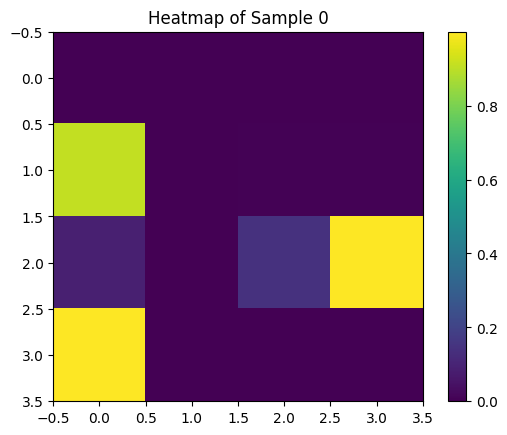

In [ ]:
plt.imshow(features_2d[8].squeeze(), cmap='viridis')
plt.colorbar()
plt.title("Heatmap of Sample 0")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2006.csv"
Data2006=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2007.csv"
Data2007=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2008.csv"
Data2008=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2009.csv"
Data2009=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2010.csv"
Data2010=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2011.csv"
Data2011=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2012.csv"
Data2012=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2101.csv"
Data2101=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2102.csv"
Data2102=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2206.csv"
Data2206=pd.read_csv(path)

In [ ]:
full_dataset = pd.concat([Data2006,Data2007, Data2008, Data2009, Data2010, Data2011, Data2012, Data2101, Data2102, Data2206 ])

In [ ]:
d = pd.DataFrame(full_dataset)

In [ ]:
d.to_csv('/content/drive/My Drive/full_dataset.csv', index=False)

In [ ]:
d

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,benign,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,outlier,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,benign,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,benign,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,benign,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959879,1.400000,350,4775,786,9200.0,4.778643,5,2,6,786,49102.0,1655251172030894,165525117202365,24490.543000,benign,0.007244
959880,39.250000,188,324,786,1723.0,1.201188,6,5,6,786,57182.0,1655251171955718,1655251171706534,615.008060,outlier,0.249184
959881,227.750000,1338,8994,786,9200.0,3.681455,12,6,6,786,47232.0,1655251160941273,1655251158203952,38036.797000,benign,2.737321
959882,144.500000,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,outlier,0.437740


In [1]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/full_dataset.csv"
fulldata=pd.read_csv(path)

In [2]:
fulldata

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,benign,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,outlier,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,benign,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,benign,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,benign,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192198792,1.400000,350,4775,786,9200.0,4.778643,5,2,6,786,49102.0,1655251172030894,165525117202365,24490.543000,benign,0.007244
192198793,39.250000,188,324,786,1723.0,1.201188,6,5,6,786,57182.0,1655251171955718,1655251171706534,615.008060,outlier,0.249184
192198794,227.750000,1338,8994,786,9200.0,3.681455,12,6,6,786,47232.0,1655251160941273,1655251158203952,38036.797000,benign,2.737321
192198795,144.500000,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,outlier,0.437740


In [3]:
fulldata['label'] = fulldata['label'].replace('benign', 0.0)
fulldata['label'] = fulldata['label'].replace('outlier', 0.5)
fulldata['label'] = fulldata['label'].replace('malicious', 1.0)

<ipython-input-3-c23a380439ab>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fulldata['label'] = fulldata['label'].replace('malicious', 1.0)


In [5]:
fulldata

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,0.0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,0.5,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,0.0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,0.0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,0.0,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192198792,1.400000,350,4775,786,9200.0,4.778643,5,2,6,786,49102.0,1655251172030894,165525117202365,24490.543000,0.0,0.007244
192198793,39.250000,188,324,786,1723.0,1.201188,6,5,6,786,57182.0,1655251171955718,1655251171706534,615.008060,0.5,0.249184
192198794,227.750000,1338,8994,786,9200.0,3.681455,12,6,6,786,47232.0,1655251160941273,1655251158203952,38036.797000,0.0,2.737321
192198795,144.500000,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,0.5,0.437740
